## KAN (Kolmogorov Arnold Network) method

1. Problem: Classification of Heart Disease using KAN appoach

2. Research paper on KAN: Kolmogorov-Arnold Networks: https://arxiv.org/pdf/2404.19756

3. Dataset from Kaggle: https://www.kaggle.com/competitions/heart-disease-uci/data

4. Access 'imodelsx' scikit-learn library to explain, predict, and steer text models/data from here: https://pypi.org/project/imodelsx/

5. Access Module imodelsx.kan.kan_sklearn from here: https://csinva.io/imodelsX/kan/kan_sklearn.html


In [1]:
#installing imodelsx for implemeting KAN (Kolmogorov-Arnold Networks)
#For more information, please refer this: https://pypi.org/project/imodelsx/
!pip install imodelsx

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.2/407.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194

In [10]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imodelsx import KANClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [11]:
#reading heart disease classification dataset. Please refer this documentation: /content/data/documentation.pdf
df = '/content/heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(df)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [12]:
#extracting input and output data from the training dataset
#excluding all column, except a last one
X = df.iloc[:, :-1]
#excluding only the last column
y = df.iloc[:, -1]
#fitting the scaler on the features
scaler = StandardScaler().fit(X)
#scaling the features
X_scaled = scaler.transform(X)
X_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [13]:
#splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=12, stratify=y)
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.35982478,  0.55599543,  0.82048698, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-1.35982478,  0.55599543,  0.82048698, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [ 0.67133319,  0.55599543,  0.82048698, ...,  1.25751537,
         0.16321028,  2.25438257],
       ...,
       [-1.35982478, -1.79857595, -0.24893198, ...,  1.25751537,
        -0.84979236, -1.02321701],
       [-1.68053393, -1.79857595,  0.82048698, ..., -0.79521891,
         1.72875982, -1.02321701],
       [ 1.0989454 ,  0.55599543,  0.82048698, ...,  1.25751537,
         0.53157488,  0.61558278]])

In [14]:
#checking shape of the train and test datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(833, 11)
(833,)
(357, 11)
(357,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#initializing a KANClassifier using GPU acceleration (CUDA device).
#KANClassifier() has default value of each parameter.
#There are parameters with their default values:
# regularize_activation=1.0
# regularize_entropy=1.0
# regularize_ridge=0.0
# grid_size=5,
# spline_order=3,
# scale_noise=0.1,
# scale_base=1.0,
# scale_spline=1.0,
# base_activation=torch.nn.SiLU,
# grid_eps=0.02,
# grid_range=[-1, 1],
model = KANClassifier(device='cuda')

#training the model on training dataset (X_train, y_train)
model=model.fit(X_train, y_train)
#predicting output for the X_test dataset
y_pred = model.predict(X_test)

#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("\nAccuracy on Test Set:", accuracy_test)
#classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:02<00:00, 37.48it/s]


Accuracy on Test Set: 0.680672268907563
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69       168
           1       0.75      0.60      0.67       189

    accuracy                           0.68       357
   macro avg       0.69      0.69      0.68       357
weighted avg       0.69      0.68      0.68       357

Confusion Matrix for Test Set:
[[129  39]
 [ 75 114]]


Performace Metrics:

* Classification Report: it provides detailed performance metrics such as precision, recall, and F1-score for each class.
* Confusion Matrix: it shows the true positives, false positives, true negatives, and false negatives, providing insights into the classification performance.

In [16]:
#defining hyperparameter ranges
#adjusting hidden layer sizes
hidden_layers = [32, 64]
#different activation regularization values
activations = [0.1, 0.3]
#different entropy regularization values
entropies = [0.1, 0.3]
#different ridge regularization values
ridges = [0.1, 0.3]
#iterating through combinations of hyperparameters including the new dropout rate
for hidden_layer_size in hidden_layers:
    for regularize_activation in activations:
        for regularize_entropy in entropies:
            for regularize_ridge in ridges:
                    kan_model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                          regularize_activation=regularize_activation,
                                          regularize_entropy=regularize_entropy,
                                          regularize_ridge=regularize_ridge)

                    #training the model
                    kan_model.fit(X_train, y_train)
                    #predicting data points using 'kan_model'
                    y_pred = kan_model.predict(X_test)
                    #printing hyperparameter values
                    print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
                    #accuracy on test dataset
                    accuracy_test = accuracy_score(y_test, y_pred)
                    print("Accuracy on Test Set:", accuracy_test)


                    #classification report for the test set
                    print("Classification Report for Test Set:")
                    print(classification_report(y_test, y_pred))

                    #confusion matrix for the test set
                    conf_matrix_test = confusion_matrix(y_test, y_pred)
                    print("Confusion Matrix for Test Set:\n", conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:01<00:00, 57.13it/s]


32 0.1 0.1 0.1
Accuracy on Test Set: 0.7394957983193278
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       168
           1       0.74      0.79      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 40 149]]


 55%|█████▌    | 55/100 [00:00<00:00, 55.11it/s]


	Early stopping
32 0.1 0.1 0.3
Accuracy on Test Set: 0.7226890756302521
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.88      0.48      0.62       168
           1       0.67      0.94      0.78       189

    accuracy                           0.72       357
   macro avg       0.77      0.71      0.70       357
weighted avg       0.77      0.72      0.70       357

Confusion Matrix for Test Set:
 [[ 80  88]
 [ 11 178]]


100%|██████████| 100/100 [00:02<00:00, 34.88it/s]


32 0.1 0.3 0.1
Accuracy on Test Set: 0.742296918767507
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       168
           1       0.76      0.76      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 46 143]]


100%|██████████| 100/100 [00:01<00:00, 55.58it/s]


32 0.1 0.3 0.3
Accuracy on Test Set: 0.6890756302521008
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.52      0.61       168
           1       0.66      0.84      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.70      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 57.54it/s]


32 0.3 0.1 0.1
Accuracy on Test Set: 0.7142857142857143
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       168
           1       0.71      0.78      0.74       189

    accuracy                           0.71       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 56.89it/s]


32 0.3 0.1 0.3
Accuracy on Test Set: 0.5686274509803921
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       168
           1       0.60      0.54      0.57       189

    accuracy                           0.57       357
   macro avg       0.57      0.57      0.57       357
weighted avg       0.57      0.57      0.57       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 87 102]]


100%|██████████| 100/100 [00:01<00:00, 57.23it/s]


32 0.3 0.3 0.1
Accuracy on Test Set: 0.6890756302521008
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       168
           1       0.67      0.83      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.70      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 57.35it/s]


32 0.3 0.3 0.3
Accuracy on Test Set: 0.48739495798319327
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.46      0.54      0.50       168
           1       0.52      0.44      0.48       189

    accuracy                           0.49       357
   macro avg       0.49      0.49      0.49       357
weighted avg       0.49      0.49      0.49       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [105  84]]


100%|██████████| 100/100 [00:02<00:00, 49.25it/s]


64 0.1 0.1 0.1
Accuracy on Test Set: 0.6078431372549019
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55       168
           1       0.61      0.70      0.66       189

    accuracy                           0.61       357
   macro avg       0.61      0.60      0.60       357
weighted avg       0.61      0.61      0.60       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 56 133]]


100%|██████████| 100/100 [00:02<00:00, 39.37it/s]


64 0.1 0.1 0.3
Accuracy on Test Set: 0.7759103641456583
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.76      0.84      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 48.54it/s]


64 0.1 0.3 0.1
Accuracy on Test Set: 0.8011204481792717
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       168
           1       0.82      0.80      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[134  34]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 56.03it/s]


64 0.1 0.3 0.3
Accuracy on Test Set: 0.742296918767507
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       168
           1       0.71      0.86      0.78       189

    accuracy                           0.74       357
   macro avg       0.75      0.73      0.73       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 57.90it/s]


64 0.3 0.1 0.1
Accuracy on Test Set: 0.7535014005602241
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       168
           1       0.71      0.89      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.75      0.74       357
weighted avg       0.77      0.75      0.75       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 57.25it/s]


64 0.3 0.1 0.3
Accuracy on Test Set: 0.7310924369747899
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       168
           1       0.73      0.78      0.75       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 42 147]]


100%|██████████| 100/100 [00:01<00:00, 56.40it/s]


64 0.3 0.3 0.1
Accuracy on Test Set: 0.7030812324929971
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       168
           1       0.72      0.72      0.72       189

    accuracy                           0.70       357
   macro avg       0.70      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 53 136]]


100%|██████████| 100/100 [00:02<00:00, 40.82it/s]

64 0.3 0.3 0.3
Accuracy on Test Set: 0.7535014005602241
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       168
           1       0.73      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 30 159]]


In [17]:
#defining hyperparameter ranges
#adjusting hidden layer sizes
hidden_layers = [32, 64, 128]
#different activation regularization values
activations = [0.1, 0.3, 0.5]
#different entropy regularization values
entropies = [0.1, 0.3, 0.5]
#different ridge regularization values
ridges = [0.1, 0.3, 0.5, 0.7]
#different spline_order values
splineOrder = [3, 5]
#iterating through combinations of hyperparameters including the new dropout rate
for hidden_layer_size in hidden_layers:
    for regularize_activation in activations:
        for regularize_entropy in entropies:
            for regularize_ridge in ridges:
              for spline_order in splineOrder:
                    kan_model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                          regularize_activation=regularize_activation,
                                          regularize_entropy=regularize_entropy,
                                          regularize_ridge=regularize_ridge,
                                          spline_order=spline_order)

                    #training the model
                    kan_model.fit(X_train, y_train)
                    #predicting data points using 'kan_model'
                    y_pred = kan_model.predict(X_test)
                    #printing hyperparameter values
                    print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge, spline_order)
                    #accuracy on test dataset
                    accuracy_test = accuracy_score(y_test, y_pred)
                    print("Accuracy on Test Set:", accuracy_test)


                    #classification report for the test set
                    print("Classification Report for Test Set:")
                    print(classification_report(y_test, y_pred))

                    #confusion matrix for the test set
                    conf_matrix_test = confusion_matrix(y_test, y_pred)
                    print("Confusion Matrix for Test Set:\n", conf_matrix_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:01<00:00, 57.16it/s]


32 0.1 0.1 0.1 3
Accuracy on Test Set: 0.5350140056022409
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.51      0.38      0.43       168
           1       0.55      0.68      0.61       189

    accuracy                           0.54       357
   macro avg       0.53      0.53      0.52       357
weighted avg       0.53      0.54      0.52       357

Confusion Matrix for Test Set:
 [[ 63 105]
 [ 61 128]]


100%|██████████| 100/100 [00:01<00:00, 50.51it/s]


32 0.1 0.1 0.1 5
Accuracy on Test Set: 0.7170868347338936
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       168
           1       0.71      0.79      0.75       189

    accuracy                           0.72       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 40 149]]


100%|██████████| 100/100 [00:02<00:00, 42.15it/s]


32 0.1 0.1 0.3 3
Accuracy on Test Set: 0.5126050420168067
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.49      0.71      0.58       168
           1       0.57      0.33      0.42       189

    accuracy                           0.51       357
   macro avg       0.53      0.52      0.50       357
weighted avg       0.53      0.51      0.50       357

Confusion Matrix for Test Set:
 [[120  48]
 [126  63]]


 56%|█████▌    | 56/100 [00:00<00:00, 57.12it/s]


	Early stopping
32 0.1 0.1 0.3 5
Accuracy on Test Set: 0.7450980392156863
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       168
           1       0.69      0.95      0.80       189

    accuracy                           0.75       357
   macro avg       0.79      0.73      0.73       357
weighted avg       0.79      0.75      0.73       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 10 179]]


 54%|█████▍    | 54/100 [00:01<00:01, 42.07it/s]


	Early stopping
32 0.1 0.1 0.5 3
Accuracy on Test Set: 0.680672268907563
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       168
           1       0.66      0.81      0.73       189

    accuracy                           0.68       357
   macro avg       0.69      0.67      0.67       357
weighted avg       0.69      0.68      0.67       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 36 153]]


 53%|█████▎    | 53/100 [00:00<00:00, 56.25it/s]


	Early stopping
32 0.1 0.1 0.5 5
Accuracy on Test Set: 0.7871148459383753
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 57.36it/s]


32 0.1 0.1 0.7 3
Accuracy on Test Set: 0.7086834733893558
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       168
           1       0.77      0.63      0.70       189

    accuracy                           0.71       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 69 120]]


 56%|█████▌    | 56/100 [00:01<00:00, 55.43it/s]


	Early stopping
32 0.1 0.1 0.7 5
Accuracy on Test Set: 0.7198879551820728
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       168
           1       0.75      0.70      0.73       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 57 132]]


100%|██████████| 100/100 [00:01<00:00, 55.85it/s]


32 0.1 0.3 0.1 3
Accuracy on Test Set: 0.6330532212885154
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       168
           1       0.66      0.62      0.64       189

    accuracy                           0.63       357
   macro avg       0.63      0.63      0.63       357
weighted avg       0.64      0.63      0.63       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 72 117]]


 56%|█████▌    | 56/100 [00:01<00:00, 55.83it/s]


	Early stopping
32 0.1 0.3 0.1 5
Accuracy on Test Set: 0.7058823529411765
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       168
           1       0.69      0.81      0.75       189

    accuracy                           0.71       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 43.97it/s]


32 0.1 0.3 0.3 3
Accuracy on Test Set: 0.6134453781512605
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       168
           1       0.67      0.54      0.60       189

    accuracy                           0.61       357
   macro avg       0.62      0.62      0.61       357
weighted avg       0.62      0.61      0.61       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 87 102]]


100%|██████████| 100/100 [00:02<00:00, 47.97it/s]


32 0.1 0.3 0.3 5
Accuracy on Test Set: 0.6918767507002801
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       168
           1       0.67      0.83      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.70      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 57.26it/s]


32 0.1 0.3 0.5 3
Accuracy on Test Set: 0.711484593837535
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       168
           1       0.70      0.79      0.74       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 40 149]]


100%|██████████| 100/100 [00:01<00:00, 56.31it/s]


32 0.1 0.3 0.5 5
Accuracy on Test Set: 0.4117647058823529
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.39      0.42      0.40       168
           1       0.44      0.40      0.42       189

    accuracy                           0.41       357
   macro avg       0.41      0.41      0.41       357
weighted avg       0.41      0.41      0.41       357

Confusion Matrix for Test Set:
 [[ 71  97]
 [113  76]]


100%|██████████| 100/100 [00:01<00:00, 57.35it/s]


32 0.1 0.3 0.7 3
Accuracy on Test Set: 0.6750700280112045
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       168
           1       0.65      0.83      0.73       189

    accuracy                           0.68       357
   macro avg       0.69      0.67      0.66       357
weighted avg       0.69      0.68      0.66       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 57.60it/s]


32 0.1 0.3 0.7 5
Accuracy on Test Set: 0.7254901960784313
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       168
           1       0.71      0.83      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 33 156]]


 56%|█████▌    | 56/100 [00:00<00:00, 56.01it/s]


	Early stopping
32 0.1 0.5 0.1 3
Accuracy on Test Set: 0.7310924369747899
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       168
           1       0.77      0.70      0.73       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 57 132]]


 55%|█████▌    | 55/100 [00:01<00:00, 48.83it/s]


	Early stopping
32 0.1 0.5 0.1 5
Accuracy on Test Set: 0.7535014005602241
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       168
           1       0.78      0.75      0.76       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 47 142]]


100%|██████████| 100/100 [00:02<00:00, 40.67it/s]


32 0.1 0.5 0.3 3
Accuracy on Test Set: 0.5714285714285714
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.54      0.65      0.59       168
           1       0.62      0.50      0.55       189

    accuracy                           0.57       357
   macro avg       0.58      0.58      0.57       357
weighted avg       0.58      0.57      0.57       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 95  94]]


100%|██████████| 100/100 [00:02<00:00, 48.23it/s]


32 0.1 0.5 0.3 5
Accuracy on Test Set: 0.6134453781512605
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.37      0.47       168
           1       0.60      0.83      0.69       189

    accuracy                           0.61       357
   macro avg       0.63      0.60      0.58       357
weighted avg       0.63      0.61      0.59       357

Confusion Matrix for Test Set:
 [[ 62 106]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 56.78it/s]


32 0.1 0.5 0.5 3
Accuracy on Test Set: 0.6414565826330533
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       168
           1       0.66      0.65      0.66       189

    accuracy                           0.64       357
   macro avg       0.64      0.64      0.64       357
weighted avg       0.64      0.64      0.64       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 66 123]]


100%|██████████| 100/100 [00:01<00:00, 57.49it/s]


32 0.1 0.5 0.5 5
Accuracy on Test Set: 0.7310924369747899
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.55      0.66       168
           1       0.69      0.89      0.78       189

    accuracy                           0.73       357
   macro avg       0.75      0.72      0.72       357
weighted avg       0.75      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 56.16it/s]


32 0.1 0.5 0.7 3
Accuracy on Test Set: 0.6946778711484594
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.74      0.69       168
           1       0.74      0.66      0.69       189

    accuracy                           0.69       357
   macro avg       0.70      0.70      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 65 124]]


100%|██████████| 100/100 [00:01<00:00, 57.40it/s]


32 0.1 0.5 0.7 5
Accuracy on Test Set: 0.6190476190476191
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.57      0.76      0.65       168
           1       0.70      0.50      0.58       189

    accuracy                           0.62       357
   macro avg       0.63      0.63      0.62       357
weighted avg       0.64      0.62      0.61       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 95  94]]


100%|██████████| 100/100 [00:02<00:00, 42.35it/s]


32 0.3 0.1 0.1 3
Accuracy on Test Set: 0.7170868347338936
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.54      0.64       168
           1       0.68      0.88      0.77       189

    accuracy                           0.72       357
   macro avg       0.74      0.71      0.70       357
weighted avg       0.73      0.72      0.71       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 47.15it/s]


32 0.3 0.1 0.1 5
Accuracy on Test Set: 0.6862745098039216
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.35      0.51       168
           1       0.63      0.98      0.77       189

    accuracy                           0.69       357
   macro avg       0.79      0.67      0.64       357
weighted avg       0.78      0.69      0.65       357

Confusion Matrix for Test Set:
 [[ 59 109]
 [  3 186]]


100%|██████████| 100/100 [00:01<00:00, 56.95it/s]


32 0.3 0.1 0.3 3
Accuracy on Test Set: 0.7086834733893558
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       168
           1       0.69      0.81      0.75       189

    accuracy                           0.71       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.71      0.71      0.70       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 57.34it/s]


32 0.3 0.1 0.3 5
Accuracy on Test Set: 0.6666666666666666
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       168
           1       0.64      0.83      0.72       189

    accuracy                           0.67       357
   macro avg       0.68      0.66      0.65       357
weighted avg       0.68      0.67      0.66       357

Confusion Matrix for Test Set:
 [[ 82  86]
 [ 33 156]]


 66%|██████▌   | 66/100 [00:01<00:00, 56.04it/s]


	Early stopping
32 0.3 0.1 0.5 3
Accuracy on Test Set: 0.5210084033613446
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       168
           1       0.54      0.60      0.57       189

    accuracy                           0.52       357
   macro avg       0.52      0.52      0.51       357
weighted avg       0.52      0.52      0.52       357

Confusion Matrix for Test Set:
 [[ 72  96]
 [ 75 114]]


100%|██████████| 100/100 [00:02<00:00, 48.48it/s]


32 0.3 0.1 0.5 5
Accuracy on Test Set: 0.7254901960784313
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.77      0.72       168
           1       0.77      0.69      0.73       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 59 130]]


100%|██████████| 100/100 [00:01<00:00, 56.44it/s]


32 0.3 0.1 0.7 3
Accuracy on Test Set: 0.5518207282913166
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       168
           1       0.59      0.50      0.54       189

    accuracy                           0.55       357
   macro avg       0.56      0.55      0.55       357
weighted avg       0.56      0.55      0.55       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 94  95]]


100%|██████████| 100/100 [00:02<00:00, 41.72it/s]


32 0.3 0.1 0.7 5
Accuracy on Test Set: 0.7030812324929971
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       168
           1       0.67      0.86      0.75       189

    accuracy                           0.70       357
   macro avg       0.72      0.69      0.69       357
weighted avg       0.72      0.70      0.69       357

Confusion Matrix for Test Set:
 [[ 89  79]
 [ 27 162]]


100%|██████████| 100/100 [00:02<00:00, 49.97it/s]


32 0.3 0.3 0.1 3
Accuracy on Test Set: 0.5546218487394958
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.53      0.43      0.48       168
           1       0.57      0.66      0.61       189

    accuracy                           0.55       357
   macro avg       0.55      0.55      0.54       357
weighted avg       0.55      0.55      0.55       357

Confusion Matrix for Test Set:
 [[ 73  95]
 [ 64 125]]


100%|██████████| 100/100 [00:01<00:00, 56.51it/s]


32 0.3 0.3 0.1 5
Accuracy on Test Set: 0.6162464985994398
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       168
           1       0.66      0.58      0.61       189

    accuracy                           0.62       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.62      0.62      0.62       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 80 109]]


100%|██████████| 100/100 [00:01<00:00, 56.99it/s]


32 0.3 0.3 0.3 3
Accuracy on Test Set: 0.5490196078431373
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.52      0.65      0.58       168
           1       0.60      0.46      0.52       189

    accuracy                           0.55       357
   macro avg       0.56      0.55      0.55       357
weighted avg       0.56      0.55      0.55       357

Confusion Matrix for Test Set:
 [[109  59]
 [102  87]]


100%|██████████| 100/100 [00:01<00:00, 56.47it/s]


32 0.3 0.3 0.3 5
Accuracy on Test Set: 0.6946778711484594
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       168
           1       0.70      0.74      0.72       189

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 56.11it/s]


32 0.3 0.3 0.5 3
Accuracy on Test Set: 0.6442577030812325
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       168
           1       0.67      0.66      0.66       189

    accuracy                           0.64       357
   macro avg       0.64      0.64      0.64       357
weighted avg       0.64      0.64      0.64       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 65 124]]


100%|██████████| 100/100 [00:01<00:00, 53.04it/s]


32 0.3 0.3 0.5 5
Accuracy on Test Set: 0.6890756302521008
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       168
           1       0.70      0.72      0.71       189

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 52 137]]


100%|██████████| 100/100 [00:02<00:00, 39.48it/s]


32 0.3 0.3 0.7 3
Accuracy on Test Set: 0.47058823529411764
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.42      0.33      0.37       168
           1       0.50      0.59      0.54       189

    accuracy                           0.47       357
   macro avg       0.46      0.46      0.46       357
weighted avg       0.46      0.47      0.46       357

Confusion Matrix for Test Set:
 [[ 56 112]
 [ 77 112]]


100%|██████████| 100/100 [00:02<00:00, 47.88it/s]


32 0.3 0.3 0.7 5
Accuracy on Test Set: 0.6750700280112045
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       168
           1       0.72      0.64      0.68       189

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 68 121]]


100%|██████████| 100/100 [00:01<00:00, 54.63it/s]


32 0.3 0.5 0.1 3
Accuracy on Test Set: 0.6666666666666666
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.38      0.51       168
           1       0.62      0.93      0.75       189

    accuracy                           0.67       357
   macro avg       0.72      0.65      0.63       357
weighted avg       0.72      0.67      0.64       357

Confusion Matrix for Test Set:
 [[ 63 105]
 [ 14 175]]


100%|██████████| 100/100 [00:01<00:00, 55.03it/s]


32 0.3 0.5 0.1 5
Accuracy on Test Set: 0.5266106442577031
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44       168
           1       0.55      0.64      0.59       189

    accuracy                           0.53       357
   macro avg       0.52      0.52      0.52       357
weighted avg       0.52      0.53      0.52       357

Confusion Matrix for Test Set:
 [[ 67 101]
 [ 68 121]]


100%|██████████| 100/100 [00:01<00:00, 56.94it/s]


32 0.3 0.5 0.3 3
Accuracy on Test Set: 0.7282913165266106
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       168
           1       0.71      0.83      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 57.08it/s]


32 0.3 0.5 0.3 5
Accuracy on Test Set: 0.6274509803921569
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.65      0.46      0.54       168
           1       0.62      0.78      0.69       189

    accuracy                           0.63       357
   macro avg       0.63      0.62      0.61       357
weighted avg       0.63      0.63      0.62       357

Confusion Matrix for Test Set:
 [[ 77  91]
 [ 42 147]]


 57%|█████▋    | 57/100 [00:01<00:00, 43.79it/s]


	Early stopping
32 0.3 0.5 0.5 3
Accuracy on Test Set: 0.6134453781512605
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52       168
           1       0.61      0.76      0.67       189

    accuracy                           0.61       357
   macro avg       0.62      0.60      0.60       357
weighted avg       0.62      0.61      0.60       357

Confusion Matrix for Test Set:
 [[ 76  92]
 [ 46 143]]


100%|██████████| 100/100 [00:02<00:00, 38.22it/s]


32 0.3 0.5 0.5 5
Accuracy on Test Set: 0.6946778711484594
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       168
           1       0.68      0.80      0.74       189

    accuracy                           0.69       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 96  72]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 56.59it/s]


32 0.3 0.5 0.7 3
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       168
           1       0.72      0.93      0.81       189

    accuracy                           0.77       357
   macro avg       0.80      0.76      0.76       357
weighted avg       0.80      0.77      0.76       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 13 176]]


100%|██████████| 100/100 [00:01<00:00, 57.58it/s]


32 0.3 0.5 0.7 5
Accuracy on Test Set: 0.6918767507002801
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       168
           1       0.70      0.74      0.72       189

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 56.54it/s]


32 0.5 0.1 0.1 3
Accuracy on Test Set: 0.6190476190476191
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       168
           1       0.67      0.56      0.61       189

    accuracy                           0.62       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.63      0.62      0.62       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 84 105]]


100%|██████████| 100/100 [00:01<00:00, 57.35it/s]


32 0.5 0.1 0.1 5
Accuracy on Test Set: 0.6750700280112045
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       168
           1       0.70      0.68      0.69       189

    accuracy                           0.68       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.68      0.68      0.68       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 60 129]]


 56%|█████▌    | 56/100 [00:01<00:01, 42.92it/s]


	Early stopping
32 0.5 0.1 0.3 3
Accuracy on Test Set: 0.6190476190476191
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       168
           1       0.62      0.72      0.67       189

    accuracy                           0.62       357
   macro avg       0.62      0.61      0.61       357
weighted avg       0.62      0.62      0.61       357

Confusion Matrix for Test Set:
 [[ 85  83]
 [ 53 136]]


100%|██████████| 100/100 [00:01<00:00, 53.27it/s]


32 0.5 0.1 0.3 5
Accuracy on Test Set: 0.6862745098039216
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       168
           1       0.67      0.82      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.68      0.68       357
weighted avg       0.69      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 34 155]]


100%|██████████| 100/100 [00:02<00:00, 37.57it/s]


32 0.5 0.1 0.5 3
Accuracy on Test Set: 0.7030812324929971
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       168
           1       0.71      0.74      0.73       189

    accuracy                           0.70       357
   macro avg       0.70      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 49 140]]


100%|██████████| 100/100 [00:01<00:00, 51.49it/s]


32 0.5 0.1 0.5 5
Accuracy on Test Set: 0.6162464985994398
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       168
           1       0.62      0.72      0.67       189

    accuracy                           0.62       357
   macro avg       0.62      0.61      0.61       357
weighted avg       0.62      0.62      0.61       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 53 136]]


 58%|█████▊    | 58/100 [00:01<00:00, 55.04it/s]


	Early stopping
32 0.5 0.1 0.7 3
Accuracy on Test Set: 0.6610644257703081
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54       168
           1       0.63      0.88      0.73       189

    accuracy                           0.66       357
   macro avg       0.69      0.65      0.63       357
weighted avg       0.69      0.66      0.64       357

Confusion Matrix for Test Set:
 [[ 70  98]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 56.25it/s]


32 0.5 0.1 0.7 5
Accuracy on Test Set: 0.7058823529411765
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       168
           1       0.81      0.58      0.68       189

    accuracy                           0.71       357
   macro avg       0.73      0.71      0.70       357
weighted avg       0.73      0.71      0.70       357

Confusion Matrix for Test Set:
 [[142  26]
 [ 79 110]]


100%|██████████| 100/100 [00:01<00:00, 56.24it/s]


32 0.5 0.3 0.1 3
Accuracy on Test Set: 0.7058823529411765
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       168
           1       0.74      0.68      0.71       189

    accuracy                           0.71       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.71      0.71      0.71       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 60 129]]


100%|██████████| 100/100 [00:01<00:00, 55.43it/s]


32 0.5 0.3 0.1 5
Accuracy on Test Set: 0.5630252100840336
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.53      0.61      0.57       168
           1       0.60      0.52      0.56       189

    accuracy                           0.56       357
   macro avg       0.57      0.57      0.56       357
weighted avg       0.57      0.56      0.56       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 91  98]]


 60%|██████    | 60/100 [00:01<00:00, 55.40it/s]


	Early stopping
32 0.5 0.3 0.3 3
Accuracy on Test Set: 0.6862745098039216
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.47      0.59       168
           1       0.65      0.88      0.75       189

    accuracy                           0.69       357
   macro avg       0.71      0.67      0.67       357
weighted avg       0.71      0.69      0.67       357

Confusion Matrix for Test Set:
 [[ 79  89]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 45.78it/s]


32 0.5 0.3 0.3 5
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       168
           1       0.80      0.76      0.78       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[132  36]
 [ 46 143]]


 62%|██████▏   | 62/100 [00:01<00:01, 36.50it/s]


	Early stopping
32 0.5 0.3 0.5 3
Accuracy on Test Set: 0.6050420168067226
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       168
           1       0.64      0.59      0.61       189

    accuracy                           0.61       357
   macro avg       0.61      0.61      0.60       357
weighted avg       0.61      0.61      0.61       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 78 111]]


100%|██████████| 100/100 [00:01<00:00, 56.41it/s]


32 0.5 0.3 0.5 5
Accuracy on Test Set: 0.6190476190476191
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       168
           1       0.64      0.63      0.64       189

    accuracy                           0.62       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.62      0.62      0.62       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 70 119]]


100%|██████████| 100/100 [00:02<00:00, 48.75it/s]


32 0.5 0.3 0.7 3
Accuracy on Test Set: 0.7170868347338936
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       168
           1       0.73      0.75      0.74       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 48 141]]


100%|██████████| 100/100 [00:01<00:00, 57.03it/s]


32 0.5 0.3 0.7 5
Accuracy on Test Set: 0.7198879551820728
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       168
           1       0.74      0.72      0.73       189

    accuracy                           0.72       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 53 136]]


100%|██████████| 100/100 [00:01<00:00, 57.06it/s]


32 0.5 0.5 0.1 3
Accuracy on Test Set: 0.6834733893557423
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69       168
           1       0.74      0.62      0.67       189

    accuracy                           0.68       357
   macro avg       0.69      0.69      0.68       357
weighted avg       0.69      0.68      0.68       357

Confusion Matrix for Test Set:
 [[127  41]
 [ 72 117]]


100%|██████████| 100/100 [00:01<00:00, 56.88it/s]


32 0.5 0.5 0.1 5
Accuracy on Test Set: 0.7366946778711485
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       168
           1       0.74      0.77      0.76       189

    accuracy                           0.74       357
   macro avg       0.74      0.73      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 44 145]]


100%|██████████| 100/100 [00:02<00:00, 45.76it/s]


32 0.5 0.5 0.3 3
Accuracy on Test Set: 0.7478991596638656
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       168
           1       0.77      0.75      0.76       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 47 142]]


100%|██████████| 100/100 [00:02<00:00, 43.12it/s]


32 0.5 0.5 0.3 5
Accuracy on Test Set: 0.5350140056022409
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       168
           1       0.56      0.60      0.58       189

    accuracy                           0.54       357
   macro avg       0.53      0.53      0.53       357
weighted avg       0.53      0.54      0.53       357

Confusion Matrix for Test Set:
 [[ 78  90]
 [ 76 113]]


100%|██████████| 100/100 [00:01<00:00, 56.60it/s]


32 0.5 0.5 0.5 3
Accuracy on Test Set: 0.6554621848739496
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       168
           1       0.66      0.74      0.69       189

    accuracy                           0.66       357
   macro avg       0.66      0.65      0.65       357
weighted avg       0.66      0.66      0.65       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 50 139]]


 62%|██████▏   | 62/100 [00:01<00:00, 55.68it/s]


	Early stopping
32 0.5 0.5 0.5 5
Accuracy on Test Set: 0.6862745098039216
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       168
           1       0.71      0.68      0.70       189

    accuracy                           0.69       357
   macro avg       0.69      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 60 129]]


100%|██████████| 100/100 [00:01<00:00, 56.85it/s]


32 0.5 0.5 0.7 3
Accuracy on Test Set: 0.7478991596638656
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.64      0.71       168
           1       0.73      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 56.81it/s]


32 0.5 0.5 0.7 5
Accuracy on Test Set: 0.6722689075630253
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.49      0.58       168
           1       0.65      0.84      0.73       189

    accuracy                           0.67       357
   macro avg       0.69      0.66      0.66       357
weighted avg       0.68      0.67      0.66       357

Confusion Matrix for Test Set:
 [[ 82  86]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 57.16it/s]


64 0.1 0.1 0.1 3
Accuracy on Test Set: 0.7563025210084033
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.61      0.70       168
           1       0.72      0.89      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 21 168]]


100%|██████████| 100/100 [00:02<00:00, 46.47it/s]


64 0.1 0.1 0.1 5
Accuracy on Test Set: 0.803921568627451
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       168
           1       0.78      0.88      0.83       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 40.61it/s]


64 0.1 0.1 0.3 3
Accuracy on Test Set: 0.6638655462184874
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       168
           1       0.67      0.73      0.70       189

    accuracy                           0.66       357
   macro avg       0.66      0.66      0.66       357
weighted avg       0.66      0.66      0.66       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 51 138]]


 66%|██████▌   | 66/100 [00:01<00:00, 44.97it/s]


	Early stopping
64 0.1 0.1 0.3 5
Accuracy on Test Set: 0.7619047619047619
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       168
           1       0.79      0.76      0.77       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[129  39]
 [ 46 143]]


100%|██████████| 100/100 [00:01<00:00, 57.09it/s]


64 0.1 0.1 0.5 3
Accuracy on Test Set: 0.7450980392156863
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.56      0.67       168
           1       0.70      0.91      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.73      0.73       357
weighted avg       0.77      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 17 172]]


100%|██████████| 100/100 [00:01<00:00, 55.11it/s]


64 0.1 0.1 0.5 5
Accuracy on Test Set: 0.4481792717086835
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.44      0.65      0.53       168
           1       0.46      0.27      0.34       189

    accuracy                           0.45       357
   macro avg       0.45      0.46      0.43       357
weighted avg       0.45      0.45      0.43       357

Confusion Matrix for Test Set:
 [[109  59]
 [138  51]]


100%|██████████| 100/100 [00:01<00:00, 56.77it/s]


64 0.1 0.1 0.7 3
Accuracy on Test Set: 0.742296918767507
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69       168
           1       0.71      0.87      0.78       189

    accuracy                           0.74       357
   macro avg       0.76      0.73      0.73       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 56.15it/s]


64 0.1 0.1 0.7 5
Accuracy on Test Set: 0.5854341736694678
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.55      0.68      0.61       168
           1       0.64      0.50      0.56       189

    accuracy                           0.59       357
   macro avg       0.59      0.59      0.58       357
weighted avg       0.60      0.59      0.58       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 95  94]]


100%|██████████| 100/100 [00:02<00:00, 45.74it/s]


64 0.1 0.3 0.1 3
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       168
           1       0.75      0.83      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[115  53]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 42.88it/s]


64 0.1 0.3 0.1 5
Accuracy on Test Set: 0.6862745098039216
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       168
           1       0.68      0.78      0.73       189

    accuracy                           0.69       357
   macro avg       0.69      0.68      0.68       357
weighted avg       0.69      0.69      0.68       357

Confusion Matrix for Test Set:
 [[ 97  71]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 57.68it/s]


64 0.1 0.3 0.3 3
Accuracy on Test Set: 0.7394957983193278
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      0.51      0.65       168
           1       0.68      0.94      0.79       189

    accuracy                           0.74       357
   macro avg       0.79      0.73      0.72       357
weighted avg       0.78      0.74      0.73       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [ 11 178]]


100%|██████████| 100/100 [00:01<00:00, 57.69it/s]


64 0.1 0.3 0.3 5
Accuracy on Test Set: 0.7030812324929971
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.50      0.61       168
           1       0.67      0.88      0.76       189

    accuracy                           0.70       357
   macro avg       0.73      0.69      0.69       357
weighted avg       0.73      0.70      0.69       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 56.39it/s]


64 0.1 0.3 0.5 3
Accuracy on Test Set: 0.7899159663865546
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.79      0.81      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 47.14it/s]


64 0.1 0.3 0.5 5
Accuracy on Test Set: 0.7142857142857143
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64       168
           1       0.68      0.87      0.76       189

    accuracy                           0.71       357
   macro avg       0.73      0.70      0.70       357
weighted avg       0.73      0.71      0.71       357

Confusion Matrix for Test Set:
 [[ 91  77]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 51.84it/s]


64 0.1 0.3 0.7 3
Accuracy on Test Set: 0.6582633053221288
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.68      0.51      0.59       168
           1       0.65      0.79      0.71       189

    accuracy                           0.66       357
   macro avg       0.66      0.65      0.65       357
weighted avg       0.66      0.66      0.65       357

Confusion Matrix for Test Set:
 [[ 86  82]
 [ 40 149]]


 63%|██████▎   | 63/100 [00:01<00:01, 36.21it/s]


	Early stopping
64 0.1 0.3 0.7 5
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 47.51it/s]


64 0.1 0.5 0.1 3
Accuracy on Test Set: 0.7282913165266106
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.58      0.67       168
           1       0.70      0.86      0.77       189

    accuracy                           0.73       357
   macro avg       0.74      0.72      0.72       357
weighted avg       0.74      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 55.96it/s]


64 0.1 0.5 0.1 5
Accuracy on Test Set: 0.7170868347338936
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       168
           1       0.72      0.76      0.74       189

    accuracy                           0.72       357
   macro avg       0.72      0.71      0.72       357
weighted avg       0.72      0.72      0.72       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 46 143]]


100%|██████████| 100/100 [00:01<00:00, 56.54it/s]


64 0.1 0.5 0.3 3
Accuracy on Test Set: 0.773109243697479
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       168
           1       0.77      0.81      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 35 154]]


100%|██████████| 100/100 [00:01<00:00, 55.83it/s]


64 0.1 0.5 0.3 5
Accuracy on Test Set: 0.5826330532212886
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.59      0.36      0.45       168
           1       0.58      0.78      0.67       189

    accuracy                           0.58       357
   macro avg       0.59      0.57      0.56       357
weighted avg       0.59      0.58      0.56       357

Confusion Matrix for Test Set:
 [[ 60 108]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 55.30it/s]


64 0.1 0.5 0.5 3
Accuracy on Test Set: 0.6946778711484594
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       168
           1       0.68      0.80      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.69      0.69       357

Confusion Matrix for Test Set:
 [[ 97  71]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 50.25it/s]


64 0.1 0.5 0.5 5
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       168
           1       0.72      0.92      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.79      0.77      0.76       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 16 173]]


100%|██████████| 100/100 [00:02<00:00, 38.40it/s]


64 0.1 0.5 0.7 3
Accuracy on Test Set: 0.7226890756302521
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       168
           1       0.70      0.84      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.72      0.71       357
weighted avg       0.73      0.72      0.72       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 30 159]]


100%|██████████| 100/100 [00:01<00:00, 53.61it/s]


64 0.1 0.5 0.7 5
Accuracy on Test Set: 0.7282913165266106
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       168
           1       0.71      0.83      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 33 156]]


 60%|██████    | 60/100 [00:01<00:00, 55.40it/s]


	Early stopping
64 0.3 0.1 0.1 3
Accuracy on Test Set: 0.773109243697479
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[119  49]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 55.99it/s]


64 0.3 0.1 0.1 5
Accuracy on Test Set: 0.5294117647058824
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.50      0.14      0.21       168
           1       0.53      0.88      0.66       189

    accuracy                           0.53       357
   macro avg       0.52      0.51      0.44       357
weighted avg       0.52      0.53      0.45       357

Confusion Matrix for Test Set:
 [[ 23 145]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 48.12it/s]


64 0.3 0.1 0.3 3
Accuracy on Test Set: 0.7619047619047619
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       168
           1       0.72      0.90      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.75      0.75       357
weighted avg       0.78      0.76      0.76       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 18 171]]


100%|██████████| 100/100 [00:01<00:00, 56.42it/s]


64 0.3 0.1 0.3 5
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.76      0.84      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 53.80it/s]


64 0.3 0.1 0.5 3
Accuracy on Test Set: 0.6722689075630253
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       168
           1       0.68      0.71      0.70       189

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.67       357
weighted avg       0.67      0.67      0.67       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 55 134]]


100%|██████████| 100/100 [00:02<00:00, 38.89it/s]


64 0.3 0.1 0.5 5
Accuracy on Test Set: 0.7619047619047619
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       168
           1       0.73      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.75      0.75       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 55.06it/s]


64 0.3 0.1 0.7 3
Accuracy on Test Set: 0.7226890756302521
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       168
           1       0.70      0.83      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.72      0.72       357

Confusion Matrix for Test Set:
 [[101  67]
 [ 32 157]]


 64%|██████▍   | 64/100 [00:01<00:00, 56.14it/s]


	Early stopping
64 0.3 0.1 0.7 5
Accuracy on Test Set: 0.7310924369747899
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       168
           1       0.71      0.82      0.76       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 55.95it/s]


64 0.3 0.3 0.1 3
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       168
           1       0.77      0.78      0.77       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 42 147]]


100%|██████████| 100/100 [00:01<00:00, 55.80it/s]


64 0.3 0.3 0.1 5
Accuracy on Test Set: 0.7619047619047619
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       168
           1       0.72      0.91      0.80       189

    accuracy                           0.76       357
   macro avg       0.79      0.75      0.75       357
weighted avg       0.78      0.76      0.75       357

Confusion Matrix for Test Set:
 [[100  68]
 [ 17 172]]


 62%|██████▏   | 62/100 [00:01<00:00, 54.14it/s]


	Early stopping
64 0.3 0.3 0.3 3
Accuracy on Test Set: 0.742296918767507
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       168
           1       0.73      0.81      0.77       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 36 153]]


100%|██████████| 100/100 [00:01<00:00, 56.72it/s]


64 0.3 0.3 0.3 5
Accuracy on Test Set: 0.7142857142857143
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.54      0.64       168
           1       0.68      0.87      0.76       189

    accuracy                           0.71       357
   macro avg       0.73      0.70      0.70       357
weighted avg       0.73      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 24 165]]


100%|██████████| 100/100 [00:02<00:00, 37.17it/s]


64 0.3 0.3 0.5 3
Accuracy on Test Set: 0.7955182072829131
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.79      0.84      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 49.00it/s]


64 0.3 0.3 0.5 5
Accuracy on Test Set: 0.7058823529411765
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       168
           1       0.66      0.90      0.76       189

    accuracy                           0.71       357
   macro avg       0.74      0.69      0.69       357
weighted avg       0.73      0.71      0.69       357

Confusion Matrix for Test Set:
 [[ 82  86]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 56.75it/s]


64 0.3 0.3 0.7 3
Accuracy on Test Set: 0.6750700280112045
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.37      0.52       168
           1       0.63      0.95      0.76       189

    accuracy                           0.68       357
   macro avg       0.74      0.66      0.64       357
weighted avg       0.74      0.68      0.64       357

Confusion Matrix for Test Set:
 [[ 62 106]
 [ 10 179]]


100%|██████████| 100/100 [00:01<00:00, 57.01it/s]


64 0.3 0.3 0.7 5
Accuracy on Test Set: 0.773109243697479
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       168
           1       0.74      0.87      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[111  57]
 [ 24 165]]


 61%|██████    | 61/100 [00:01<00:00, 54.75it/s]


	Early stopping
64 0.3 0.5 0.1 3
Accuracy on Test Set: 0.6750700280112045
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.69      0.57      0.62       168
           1       0.67      0.77      0.72       189

    accuracy                           0.68       357
   macro avg       0.68      0.67      0.67       357
weighted avg       0.68      0.68      0.67       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 43 146]]


 60%|██████    | 60/100 [00:01<00:00, 54.67it/s]


	Early stopping
64 0.3 0.5 0.1 5
Accuracy on Test Set: 0.7030812324929971
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       168
           1       0.68      0.83      0.75       189

    accuracy                           0.70       357
   macro avg       0.71      0.70      0.69       357
weighted avg       0.71      0.70      0.70       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 32 157]]


 63%|██████▎   | 63/100 [00:01<00:00, 55.50it/s]


	Early stopping
64 0.3 0.5 0.3 3
Accuracy on Test Set: 0.7198879551820728
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.88      0.47      0.61       168
           1       0.67      0.94      0.78       189

    accuracy                           0.72       357
   macro avg       0.77      0.71      0.70       357
weighted avg       0.77      0.72      0.70       357

Confusion Matrix for Test Set:
 [[ 79  89]
 [ 11 178]]


100%|██████████| 100/100 [00:01<00:00, 57.43it/s]


64 0.3 0.5 0.3 5
Accuracy on Test Set: 0.7843137254901961
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       168
           1       0.82      0.76      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.79      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[136  32]
 [ 45 144]]


100%|██████████| 100/100 [00:02<00:00, 38.80it/s]


64 0.3 0.5 0.5 3
Accuracy on Test Set: 0.7507002801120448
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       168
           1       0.72      0.86      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 26 163]]


 59%|█████▉    | 59/100 [00:01<00:00, 53.41it/s]


	Early stopping
64 0.3 0.5 0.5 5
Accuracy on Test Set: 0.7675070028011205
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       168
           1       0.71      0.95      0.81       189

    accuracy                           0.77       357
   macro avg       0.81      0.76      0.75       357
weighted avg       0.80      0.77      0.76       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 10 179]]


100%|██████████| 100/100 [00:01<00:00, 56.61it/s]


64 0.3 0.5 0.7 3
Accuracy on Test Set: 0.7002801120448179
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63       168
           1       0.67      0.85      0.75       189

    accuracy                           0.70       357
   macro avg       0.71      0.69      0.69       357
weighted avg       0.71      0.70      0.69       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 55.47it/s]


64 0.3 0.5 0.7 5
Accuracy on Test Set: 0.6946778711484594
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       168
           1       0.69      0.76      0.73       189

    accuracy                           0.69       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.69      0.69      0.69       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 45 144]]


100%|██████████| 100/100 [00:02<00:00, 47.17it/s]


64 0.5 0.1 0.1 3
Accuracy on Test Set: 0.6498599439775911
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       168
           1       0.65      0.73      0.69       189

    accuracy                           0.65       357
   macro avg       0.65      0.64      0.64       357
weighted avg       0.65      0.65      0.65       357

Confusion Matrix for Test Set:
 [[ 94  74]
 [ 51 138]]


100%|██████████| 100/100 [00:01<00:00, 55.57it/s]


64 0.5 0.1 0.1 5
Accuracy on Test Set: 0.7058823529411765
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       168
           1       0.67      0.87      0.76       189

    accuracy                           0.71       357
   macro avg       0.73      0.70      0.69       357
weighted avg       0.72      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 24 165]]


 61%|██████    | 61/100 [00:01<00:00, 55.19it/s]


	Early stopping
64 0.5 0.1 0.3 3
Accuracy on Test Set: 0.6050420168067226
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.33      0.44       168
           1       0.59      0.85      0.70       189

    accuracy                           0.61       357
   macro avg       0.63      0.59      0.57       357
weighted avg       0.62      0.61      0.57       357

Confusion Matrix for Test Set:
 [[ 55 113]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 41.33it/s]


64 0.5 0.1 0.3 5
Accuracy on Test Set: 0.711484593837535
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.58      0.66       168
           1       0.69      0.83      0.75       189

    accuracy                           0.71       357
   macro avg       0.72      0.70      0.70       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 47.92it/s]


64 0.5 0.1 0.5 3
Accuracy on Test Set: 0.7254901960784313
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       168
           1       0.71      0.81      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.72       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 35 154]]


 61%|██████    | 61/100 [00:01<00:00, 53.87it/s]


	Early stopping
64 0.5 0.1 0.5 5
Accuracy on Test Set: 0.7647058823529411
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       168
           1       0.73      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.76      0.76       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 56.19it/s]


64 0.5 0.1 0.7 3
Accuracy on Test Set: 0.7282913165266106
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       168
           1       0.72      0.80      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 56.47it/s]


64 0.5 0.1 0.7 5
Accuracy on Test Set: 0.6246498599439776
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.27      0.40       168
           1       0.59      0.94      0.73       189

    accuracy                           0.62       357
   macro avg       0.70      0.60      0.56       357
weighted avg       0.69      0.62      0.57       357

Confusion Matrix for Test Set:
 [[ 45 123]
 [ 11 178]]


100%|██████████| 100/100 [00:01<00:00, 56.97it/s]


64 0.5 0.3 0.1 3
Accuracy on Test Set: 0.7535014005602241
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       168
           1       0.72      0.88      0.79       189

    accuracy                           0.75       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.75      0.75       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 22 167]]


 64%|██████▍   | 64/100 [00:01<00:00, 55.57it/s]


	Early stopping
64 0.5 0.3 0.1 5
Accuracy on Test Set: 0.803921568627451
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       168
           1       0.78      0.88      0.83       189

    accuracy                           0.80       357
   macro avg       0.81      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 22 167]]


100%|██████████| 100/100 [00:02<00:00, 47.38it/s]


64 0.5 0.3 0.3 3
Accuracy on Test Set: 0.7815126050420168
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.85      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 42.24it/s]


64 0.5 0.3 0.3 5
Accuracy on Test Set: 0.7675070028011205
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.62      0.71       168
           1       0.73      0.90      0.80       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.78      0.77      0.76       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 57.08it/s]


64 0.5 0.3 0.5 3
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 57.09it/s]


64 0.5 0.3 0.5 5
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       168
           1       0.74      0.83      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 56.69it/s]


64 0.5 0.3 0.7 3
Accuracy on Test Set: 0.7563025210084033
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.65      0.71       168
           1       0.73      0.85      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 48.30it/s]


64 0.5 0.3 0.7 5
Accuracy on Test Set: 0.7759103641456583
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       168
           1       0.78      0.80      0.79       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 57.01it/s]


64 0.5 0.5 0.1 3
Accuracy on Test Set: 0.6302521008403361
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       168
           1       0.66      0.61      0.64       189

    accuracy                           0.63       357
   macro avg       0.63      0.63      0.63       357
weighted avg       0.63      0.63      0.63       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 73 116]]


 56%|█████▌    | 56/100 [00:01<00:01, 37.89it/s]


	Early stopping
64 0.5 0.5 0.1 5
Accuracy on Test Set: 0.7507002801120448
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       168
           1       0.73      0.85      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 28 161]]


100%|██████████| 100/100 [00:02<00:00, 44.79it/s]


64 0.5 0.5 0.3 3
Accuracy on Test Set: 0.7647058823529411
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       168
           1       0.75      0.83      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[116  52]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 55.61it/s]


64 0.5 0.5 0.3 5
Accuracy on Test Set: 0.6218487394957983
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55       168
           1       0.62      0.74      0.67       189

    accuracy                           0.62       357
   macro avg       0.62      0.61      0.61       357
weighted avg       0.62      0.62      0.62       357

Confusion Matrix for Test Set:
 [[ 83  85]
 [ 50 139]]


100%|██████████| 100/100 [00:01<00:00, 56.56it/s]


64 0.5 0.5 0.5 3
Accuracy on Test Set: 0.6638655462184874
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.68      0.54      0.60       168
           1       0.65      0.78      0.71       189

    accuracy                           0.66       357
   macro avg       0.67      0.66      0.66       357
weighted avg       0.67      0.66      0.66       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 42 147]]


100%|██████████| 100/100 [00:01<00:00, 56.64it/s]


64 0.5 0.5 0.5 5
Accuracy on Test Set: 0.7086834733893558
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       168
           1       0.78      0.62      0.69       189

    accuracy                           0.71       357
   macro avg       0.72      0.71      0.71       357
weighted avg       0.72      0.71      0.71       357

Confusion Matrix for Test Set:
 [[135  33]
 [ 71 118]]


100%|██████████| 100/100 [00:01<00:00, 57.40it/s]


64 0.5 0.5 0.7 3
Accuracy on Test Set: 0.7843137254901961
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 57.29it/s]


64 0.5 0.5 0.7 5
Accuracy on Test Set: 0.7366946778711485
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64       168
           1       0.68      0.95      0.79       189

    accuracy                           0.74       357
   macro avg       0.79      0.72      0.72       357
weighted avg       0.78      0.74      0.72       357

Confusion Matrix for Test Set:
 [[ 84  84]
 [ 10 179]]


100%|██████████| 100/100 [00:02<00:00, 38.94it/s]


128 0.1 0.1 0.1 3
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 52.19it/s]


128 0.1 0.1 0.1 5
Accuracy on Test Set: 0.7619047619047619
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       168
           1       0.74      0.86      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 55.81it/s]


128 0.1 0.1 0.3 3
Accuracy on Test Set: 0.773109243697479
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       168
           1       0.73      0.90      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.77      0.77       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 19 170]]


100%|██████████| 100/100 [00:01<00:00, 54.68it/s]


128 0.1 0.1 0.3 5
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.61      0.70       168
           1       0.72      0.89      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[102  66]
 [ 20 169]]


100%|██████████| 100/100 [00:02<00:00, 47.49it/s]


128 0.1 0.1 0.5 3
Accuracy on Test Set: 0.7002801120448179
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.57      0.64       168
           1       0.68      0.82      0.74       189

    accuracy                           0.70       357
   macro avg       0.71      0.69      0.69       357
weighted avg       0.71      0.70      0.69       357

Confusion Matrix for Test Set:
 [[ 95  73]
 [ 34 155]]


100%|██████████| 100/100 [00:01<00:00, 55.82it/s]


128 0.1 0.1 0.5 5
Accuracy on Test Set: 0.7927170868347339
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       168
           1       0.78      0.85      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[123  45]
 [ 29 160]]


100%|██████████| 100/100 [00:02<00:00, 45.63it/s]


128 0.1 0.1 0.7 3
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.84      0.79       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 31 158]]


100%|██████████| 100/100 [00:02<00:00, 42.40it/s]


128 0.1 0.1 0.7 5
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.64      0.71       168
           1       0.73      0.87      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 51.45it/s]


128 0.1 0.3 0.1 3
Accuracy on Test Set: 0.773109243697479
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       168
           1       0.73      0.90      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.77      0.77       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 19 170]]


 62%|██████▏   | 62/100 [00:01<00:00, 53.32it/s]


	Early stopping
128 0.1 0.3 0.1 5
Accuracy on Test Set: 0.7871148459383753
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 54.52it/s]


128 0.1 0.3 0.3 3
Accuracy on Test Set: 0.8011204481792717
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       168
           1       0.82      0.80      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[135  33]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 54.04it/s]


128 0.1 0.3 0.3 5
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.62      0.71       168
           1       0.72      0.88      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[105  63]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 49.65it/s]


128 0.1 0.3 0.5 3
Accuracy on Test Set: 0.8011204481792717
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       168
           1       0.82      0.80      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[134  34]
 [ 37 152]]


100%|██████████| 100/100 [00:02<00:00, 39.38it/s]


128 0.1 0.3 0.5 5
Accuracy on Test Set: 0.7647058823529411
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       168
           1       0.73      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.76      0.76       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 22 167]]


100%|██████████| 100/100 [00:02<00:00, 49.47it/s]


128 0.1 0.3 0.7 3
Accuracy on Test Set: 0.773109243697479
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       168
           1       0.76      0.84      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 30 159]]


100%|██████████| 100/100 [00:02<00:00, 44.44it/s]


128 0.1 0.3 0.7 5
Accuracy on Test Set: 0.7338935574229691
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       168
           1       0.72      0.80      0.76       189

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 53.67it/s]


128 0.1 0.5 0.1 3
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       168
           1       0.76      0.84      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 51.10it/s]


128 0.1 0.5 0.1 5
Accuracy on Test Set: 0.7619047619047619
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       168
           1       0.73      0.86      0.79       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 53.48it/s]


128 0.1 0.5 0.3 3
Accuracy on Test Set: 0.7899159663865546
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       168
           1       0.79      0.83      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 33 156]]


 63%|██████▎   | 63/100 [00:01<00:00, 43.71it/s]


	Early stopping
128 0.1 0.5 0.3 5
Accuracy on Test Set: 0.7927170868347339
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       168
           1       0.80      0.81      0.81       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[130  38]
 [ 36 153]]


100%|██████████| 100/100 [00:02<00:00, 39.98it/s]


128 0.1 0.5 0.5 3
Accuracy on Test Set: 0.7394957983193278
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       168
           1       0.72      0.83      0.77       189

    accuracy                           0.74       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 32 157]]


100%|██████████| 100/100 [00:01<00:00, 55.14it/s]


128 0.1 0.5 0.5 5
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       168
           1       0.74      0.88      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 54.00it/s]


128 0.1 0.5 0.7 3
Accuracy on Test Set: 0.7507002801120448
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       168
           1       0.73      0.85      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.75       357
weighted avg       0.76      0.75      0.75       357

Confusion Matrix for Test Set:
 [[108  60]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 53.86it/s]


128 0.1 0.5 0.7 5
Accuracy on Test Set: 0.7563025210084033
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       168
           1       0.74      0.84      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.75       357

Confusion Matrix for Test Set:
 [[112  56]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 53.82it/s]


128 0.3 0.1 0.1 3
Accuracy on Test Set: 0.7450980392156863
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68       168
           1       0.71      0.89      0.79       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.73       357
weighted avg       0.76      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 21 168]]


100%|██████████| 100/100 [00:01<00:00, 53.56it/s]


128 0.3 0.1 0.1 5
Accuracy on Test Set: 0.7983193277310925
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       168
           1       0.80      0.83      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[128  40]
 [ 32 157]]


100%|██████████| 100/100 [00:02<00:00, 36.38it/s]


128 0.3 0.1 0.3 3
Accuracy on Test Set: 0.7226890756302521
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       168
           1       0.70      0.85      0.76       189

    accuracy                           0.72       357
   macro avg       0.73      0.71      0.71       357
weighted avg       0.73      0.72      0.72       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 29 160]]


 68%|██████▊   | 68/100 [00:01<00:00, 45.06it/s]


	Early stopping
128 0.3 0.1 0.3 5
Accuracy on Test Set: 0.7955182072829131
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.67      0.76       168
           1       0.76      0.90      0.82       189

    accuracy                           0.80       357
   macro avg       0.81      0.79      0.79       357
weighted avg       0.81      0.80      0.79       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 45.38it/s]


128 0.3 0.1 0.5 3
Accuracy on Test Set: 0.7927170868347339
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       168
           1       0.76      0.88      0.82       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 53.27it/s]


128 0.3 0.1 0.5 5
Accuracy on Test Set: 0.742296918767507
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       168
           1       0.73      0.83      0.77       189

    accuracy                           0.74       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.74      0.74       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 52.98it/s]


128 0.3 0.1 0.7 3
Accuracy on Test Set: 0.7843137254901961
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.76      0.86      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 27 162]]


100%|██████████| 100/100 [00:01<00:00, 52.84it/s]


128 0.3 0.1 0.7 5
Accuracy on Test Set: 0.6330532212885154
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       168
           1       0.63      0.73      0.68       189

    accuracy                           0.63       357
   macro avg       0.63      0.63      0.63       357
weighted avg       0.63      0.63      0.63       357

Confusion Matrix for Test Set:
 [[ 88  80]
 [ 51 138]]


100%|██████████| 100/100 [00:02<00:00, 43.80it/s]


128 0.3 0.3 0.1 3
Accuracy on Test Set: 0.7366946778711485
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.52      0.65       168
           1       0.68      0.93      0.79       189

    accuracy                           0.74       357
   macro avg       0.78      0.72      0.72       357
weighted avg       0.77      0.74      0.72       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 13 176]]


 58%|█████▊    | 58/100 [00:01<00:01, 34.62it/s]


	Early stopping
128 0.3 0.3 0.1 5
Accuracy on Test Set: 0.7983193277310925
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       168
           1       0.82      0.80      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[134  34]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 44.44it/s]


128 0.3 0.3 0.3 3
Accuracy on Test Set: 0.7899159663865546
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       168
           1       0.80      0.80      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[131  37]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 51.40it/s]


128 0.3 0.3 0.3 5
Accuracy on Test Set: 0.742296918767507
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       168
           1       0.73      0.80      0.77       189

    accuracy                           0.74       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.74      0.74      0.74       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 37 152]]


100%|██████████| 100/100 [00:01<00:00, 51.56it/s]


128 0.3 0.3 0.5 3
Accuracy on Test Set: 0.7815126050420168
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       168
           1       0.75      0.88      0.81       189

    accuracy                           0.78       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.78      0.78       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 23 166]]


100%|██████████| 100/100 [00:01<00:00, 51.76it/s]


128 0.3 0.3 0.5 5
Accuracy on Test Set: 0.7535014005602241
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       168
           1       0.76      0.78      0.77       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[121  47]
 [ 41 148]]


100%|██████████| 100/100 [00:02<00:00, 49.75it/s]


128 0.3 0.3 0.7 3
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.64      0.72       168
           1       0.73      0.89      0.80       189

    accuracy                           0.77       357
   macro avg       0.78      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 21 168]]


100%|██████████| 100/100 [00:02<00:00, 34.86it/s]


128 0.3 0.3 0.7 5
Accuracy on Test Set: 0.6582633053221288
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       168
           1       0.66      0.72      0.69       189

    accuracy                           0.66       357
   macro avg       0.66      0.65      0.65       357
weighted avg       0.66      0.66      0.66       357

Confusion Matrix for Test Set:
 [[ 99  69]
 [ 53 136]]


100%|██████████| 100/100 [00:02<00:00, 46.16it/s]


128 0.3 0.5 0.1 3
Accuracy on Test Set: 0.7871148459383753
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       168
           1       0.81      0.78      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 41 148]]


 61%|██████    | 61/100 [00:01<00:00, 52.31it/s]


	Early stopping
128 0.3 0.5 0.1 5
Accuracy on Test Set: 0.7366946778711485
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.54      0.66       168
           1       0.69      0.91      0.79       189

    accuracy                           0.74       357
   macro avg       0.77      0.73      0.72       357
weighted avg       0.76      0.74      0.73       357

Confusion Matrix for Test Set:
 [[ 91  77]
 [ 17 172]]


100%|██████████| 100/100 [00:01<00:00, 53.85it/s]


128 0.3 0.5 0.3 3
Accuracy on Test Set: 0.7955182072829131
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       168
           1       0.78      0.86      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.80      0.79       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 27 162]]


 63%|██████▎   | 63/100 [00:01<00:00, 51.02it/s]


	Early stopping
128 0.3 0.5 0.3 5
Accuracy on Test Set: 0.7647058823529411
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       168
           1       0.74      0.86      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 52.29it/s]


128 0.3 0.5 0.5 3
Accuracy on Test Set: 0.7142857142857143
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       168
           1       0.66      0.95      0.78       189

    accuracy                           0.71       357
   macro avg       0.78      0.70      0.69       357
weighted avg       0.77      0.71      0.69       357

Confusion Matrix for Test Set:
 [[ 75  93]
 [  9 180]]


100%|██████████| 100/100 [00:01<00:00, 54.09it/s]


128 0.3 0.5 0.5 5
Accuracy on Test Set: 0.8011204481792717
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       168
           1       0.81      0.81      0.81       189

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[133  35]
 [ 36 153]]


100%|██████████| 100/100 [00:02<00:00, 39.11it/s]


128 0.3 0.5 0.7 3
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.62      0.72       168
           1       0.73      0.90      0.81       189

    accuracy                           0.77       357
   macro avg       0.79      0.76      0.76       357
weighted avg       0.79      0.77      0.76       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 45.19it/s]


128 0.3 0.5 0.7 5
Accuracy on Test Set: 0.7759103641456583
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       168
           1       0.75      0.87      0.80       189

    accuracy                           0.78       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.78      0.78      0.77       357

Confusion Matrix for Test Set:
 [[113  55]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 52.73it/s]


128 0.5 0.1 0.1 3
Accuracy on Test Set: 0.6974789915966386
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       168
           1       0.68      0.80      0.74       189

    accuracy                           0.70       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.70      0.70      0.69       357

Confusion Matrix for Test Set:
 [[ 98  70]
 [ 38 151]]


100%|██████████| 100/100 [00:01<00:00, 52.60it/s]


128 0.5 0.1 0.1 5
Accuracy on Test Set: 0.7310924369747899
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       168
           1       0.72      0.81      0.76       189

    accuracy                           0.73       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Test Set:
 [[107  61]
 [ 35 154]]


 62%|██████▏   | 62/100 [00:01<00:00, 51.22it/s]


	Early stopping
128 0.5 0.1 0.3 3
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       168
           1       0.75      0.81      0.78       189

    accuracy                           0.76       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix for Test Set:
 [[117  51]
 [ 35 154]]


100%|██████████| 100/100 [00:02<00:00, 45.78it/s]


128 0.5 0.1 0.3 5
Accuracy on Test Set: 0.773109243697479
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       168
           1       0.78      0.80      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 48.55it/s]


128 0.5 0.1 0.5 3
Accuracy on Test Set: 0.7675070028011205
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       168
           1       0.76      0.83      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[118  50]
 [ 33 156]]


100%|██████████| 100/100 [00:02<00:00, 37.55it/s]


128 0.5 0.1 0.5 5
Accuracy on Test Set: 0.7450980392156863
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       168
           1       0.71      0.86      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.75      0.75      0.74       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 26 163]]


 62%|██████▏   | 62/100 [00:01<00:00, 52.96it/s]


	Early stopping
128 0.5 0.1 0.7 3
Accuracy on Test Set: 0.7478991596638656
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       168
           1       0.72      0.86      0.78       189

    accuracy                           0.75       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.76      0.75      0.74       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 53.40it/s]


128 0.5 0.1 0.7 5
Accuracy on Test Set: 0.7983193277310925
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       168
           1       0.78      0.86      0.82       189

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.80       357
weighted avg       0.80      0.80      0.80       357

Confusion Matrix for Test Set:
 [[122  46]
 [ 26 163]]


100%|██████████| 100/100 [00:01<00:00, 52.57it/s]


128 0.5 0.3 0.1 3
Accuracy on Test Set: 0.7478991596638656
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       168
           1       0.73      0.84      0.78       189

    accuracy                           0.75       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[109  59]
 [ 31 158]]


100%|██████████| 100/100 [00:01<00:00, 54.38it/s]


128 0.5 0.3 0.1 5
Accuracy on Test Set: 0.7871148459383753
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       168
           1       0.78      0.83      0.80       189

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.79      0.79      0.79       357

Confusion Matrix for Test Set:
 [[125  43]
 [ 33 156]]


100%|██████████| 100/100 [00:01<00:00, 54.97it/s]


128 0.5 0.3 0.3 3
Accuracy on Test Set: 0.7338935574229691
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.54      0.66       168
           1       0.69      0.90      0.78       189

    accuracy                           0.73       357
   macro avg       0.76      0.72      0.72       357
weighted avg       0.76      0.73      0.72       357

Confusion Matrix for Test Set:
 [[ 91  77]
 [ 18 171]]


100%|██████████| 100/100 [00:02<00:00, 45.78it/s]


128 0.5 0.3 0.3 5
Accuracy on Test Set: 0.7619047619047619
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       168
           1       0.73      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[106  62]
 [ 23 166]]


100%|██████████| 100/100 [00:02<00:00, 37.89it/s]


128 0.5 0.3 0.5 3
Accuracy on Test Set: 0.7591036414565826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       168
           1       0.72      0.88      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.75      0.75       357
weighted avg       0.77      0.76      0.75       357

Confusion Matrix for Test Set:
 [[104  64]
 [ 22 167]]


100%|██████████| 100/100 [00:01<00:00, 54.37it/s]


128 0.5 0.3 0.5 5
Accuracy on Test Set: 0.7507002801120448
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       168
           1       0.69      0.96      0.80       189

    accuracy                           0.75       357
   macro avg       0.80      0.74      0.73       357
weighted avg       0.80      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [  8 181]]


100%|██████████| 100/100 [00:02<00:00, 46.11it/s]


128 0.5 0.3 0.7 3
Accuracy on Test Set: 0.7030812324929971
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       168
           1       0.69      0.78      0.74       189

    accuracy                           0.70       357
   macro avg       0.71      0.70      0.70       357
weighted avg       0.70      0.70      0.70       357

Confusion Matrix for Test Set:
 [[103  65]
 [ 41 148]]


100%|██████████| 100/100 [00:01<00:00, 55.39it/s]


128 0.5 0.3 0.7 5
Accuracy on Test Set: 0.7394957983193278
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.55      0.67       168
           1       0.70      0.90      0.79       189

    accuracy                           0.74       357
   macro avg       0.77      0.73      0.73       357
weighted avg       0.76      0.74      0.73       357

Confusion Matrix for Test Set:
 [[ 93  75]
 [ 18 171]]


100%|██████████| 100/100 [00:01<00:00, 55.21it/s]


128 0.5 0.5 0.1 3
Accuracy on Test Set: 0.7675070028011205
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       168
           1       0.75      0.85      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[114  54]
 [ 29 160]]


100%|██████████| 100/100 [00:01<00:00, 54.23it/s]


128 0.5 0.5 0.1 5
Accuracy on Test Set: 0.7703081232492998
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       168
           1       0.77      0.80      0.79       189

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

Confusion Matrix for Test Set:
 [[124  44]
 [ 38 151]]


100%|██████████| 100/100 [00:02<00:00, 37.37it/s]


128 0.5 0.5 0.3 3
Accuracy on Test Set: 0.7647058823529411
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       168
           1       0.74      0.86      0.80       189

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357

Confusion Matrix for Test Set:
 [[110  58]
 [ 26 163]]


100%|██████████| 100/100 [00:02<00:00, 48.96it/s]


128 0.5 0.5 0.3 5
Accuracy on Test Set: 0.7507002801120448
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.91      0.52      0.66       168
           1       0.69      0.95      0.80       189

    accuracy                           0.75       357
   macro avg       0.80      0.74      0.73       357
weighted avg       0.79      0.75      0.74       357

Confusion Matrix for Test Set:
 [[ 88  80]
 [  9 180]]


 61%|██████    | 61/100 [00:01<00:00, 51.71it/s]


	Early stopping
128 0.5 0.5 0.5 3
Accuracy on Test Set: 0.711484593837535
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64       168
           1       0.68      0.87      0.76       189

    accuracy                           0.71       357
   macro avg       0.73      0.70      0.70       357
weighted avg       0.73      0.71      0.70       357

Confusion Matrix for Test Set:
 [[ 90  78]
 [ 25 164]]


100%|██████████| 100/100 [00:01<00:00, 53.18it/s]


128 0.5 0.5 0.5 5
Accuracy on Test Set: 0.7535014005602241
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       168
           1       0.77      0.76      0.76       189

    accuracy                           0.75       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.75      0.75      0.75       357

Confusion Matrix for Test Set:
 [[126  42]
 [ 46 143]]


100%|██████████| 100/100 [00:01<00:00, 52.94it/s]


128 0.5 0.5 0.7 3
Accuracy on Test Set: 0.7927170868347339
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       168
           1       0.77      0.86      0.81       189

    accuracy                           0.79       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.79      0.79       357

Confusion Matrix for Test Set:
 [[120  48]
 [ 26 163]]


 61%|██████    | 61/100 [00:01<00:00, 53.49it/s]

	Early stopping
128 0.5 0.5 0.7 5
Accuracy on Test Set: 0.7394957983193278
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.88      0.52      0.65       168
           1       0.69      0.94      0.79       189

    accuracy                           0.74       357
   macro avg       0.78      0.73      0.72       357
weighted avg       0.78      0.74      0.73       357

Confusion Matrix for Test Set:
 [[ 87  81]
 [ 12 177]]


In [ ]:
#training KAN model using best hyperparamter set from the previous trials
kan_model = KANClassifier(device='cuda', hidden_layer_size=128, regularize_activation=.5,
                      regularize_entropy=.5, regularize_ridge=.1, spline_order=5)

#fitting the model on train set
kan_model.fit(X_train, y_train, batch_size=64, lr=.07, weight_decay=.01)

#predicting data points using 'kan_model'
y_pred = kan_model.predict(X_test)
#printing hyperparameter values
print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy_test)

#classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:\n", conf_matrix_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  4%|▍         | 4/100 [00:00<00:07, 12.30it/s]


	Early stopping
128 0.5 0.5 0.7
Accuracy on Test Set: 0.84593837535014
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       168
           1       0.85      0.86      0.86       189

    accuracy                           0.85       357
   macro avg       0.85      0.84      0.85       357
weighted avg       0.85      0.85      0.85       357

Confusion Matrix for Test Set:
 [[139  29]
 [ 26 163]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


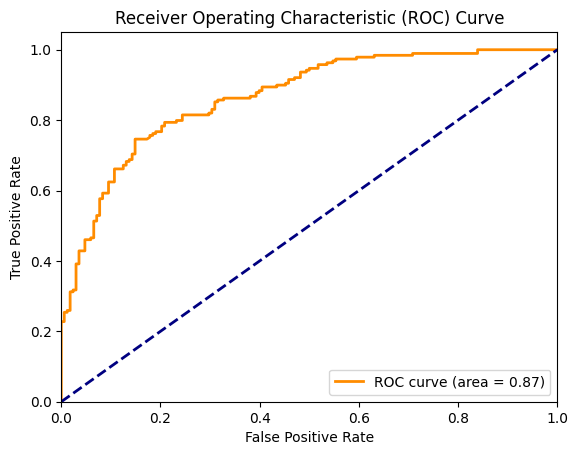

In [18]:
#ploting ROC curve as well
#predicting probabilities for the test set
y_prob = kan_model.predict_proba(X_test)[:, 1]

#creating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#ploting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


In [19]:
import pickle

# Assuming your trained model is named `model`
with open('/content/trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Install necessary libraries
!pip install fastapi uvicorn nest-asyncio pyngrok pydantic scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.9 MB/s eta 0:00:00


In [21]:
# Authenticate ngrok with your authtoken
!ngrok authtoken 2msLLEi5ief6AyQ62myQYCJ6urY_68DBGK7XFgUpkwzAUJtLU

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Import the required libraries
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
from fastapi.responses import HTMLResponse
import nest_asyncio
from pyngrok import ngrok
import pickle

# Load your trained model (replace with your actual model path)
with open('/content/trained_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Initialize FastAPI app
app = FastAPI()

# Define input schema using Pydantic
class Features(BaseModel):
    age: float
    sex: float
    cp: float
    trestbps: float
    chol: float
    fbs: float
    restecg: float
    thalach: float
    exang: float
    oldpeak: float
    slope: float

# Endpoint to handle prediction
@app.post("/predict")
async def predict(features: Features):
    data = np.array([[features.age, features.sex, features.cp, features.trestbps,
                      features.chol, features.fbs, features.restecg, features.thalach,
                      features.exang, features.oldpeak, features.slope]])  # Include oldpeak
    prediction = model.predict(data)

    # Interpret the prediction result
    if prediction[0] == 0:
      disease_status = "No heart disease"
    else:
      disease_status = "Heart disease detected"
      print(f"Prediction: {prediction}, Disease Status: {disease_status}")


    # Return HTML response with prediction result
    return HTMLResponse(content=f"""
    <html>
        <head>
            <title>Prediction Result</title>
            <style>
                body {{
                    font-family: Arial, sans-serif;
                    background-color: #f4f4f9;
                    padding: 50px;
                    text-align: center;
                }}
                h1 {{
                    color: #333;
                }}
                p {{
                    font-size: 20px;
                    color: #333;
                }}
                a {{
                    text-decoration: none;
                    color: #4CAF50;
                    font-weight: bold;
                }}
                a:hover {{
                    text-decoration: underline;
                }}
            </style>
        </head>
        <body>
            <h1>Prediction Result</h1>
            <p>The predicted outcome for heart disease is: <strong>{disease_status}</strong></p>
            <p><a href="/">Go Back</a></p>
        </body>
    </html>
    """)

# Serve the enhanced HTML form with CSS
@app.get("/", response_class=HTMLResponse)
async def read_form():
    return """
    <html>
        <head>
            <title>Heart Disease Prediction</title>
            <style>
                body {
                    font-family: Arial, sans-serif;
                    background-color: #f4f4f9;
                    padding: 50px;
                    text-align: center;
                }
                h1 {
                    color: #333;
                }
                form {
                    background-color: #fff;
                    padding: 20px;
                    border-radius: 10px;
                    box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
                    display: inline-block;
                    max-width: 400px;
                    text-align: left;
                }
                input[type="number"], input[type="submit"] {
                    width: 100%;
                    padding: 10px;
                    margin: 10px 0;
                    border: 1px solid #ccc;
                    border-radius: 5px;
                    font-size: 16px;
                }
                input[type="submit"] {
                    background-color: #4CAF50;
                    color: white;
                    border: none;
                    cursor: pointer;
                }
                input[type="submit"]:hover {
                    background-color: #45a049;
                }
            </style>
            <script>
                async function submitForm(event) {
                    event.preventDefault();  // Prevent default form submission

                    // Gather form data
                    const formData = {
                        age: parseFloat(document.getElementById('age').value),
                        sex: parseFloat(document.getElementById('sex').value),
                        cp: parseFloat(document.getElementById('cp').value),
                        trestbps: parseFloat(document.getElementById('trestbps').value),
                        chol: parseFloat(document.getElementById('chol').value),
                        fbs: parseFloat(document.getElementById('fbs').value),
                        restecg: parseFloat(document.getElementById('restecg').value),
                        thalach: parseFloat(document.getElementById('thalach').value),
                        exang: parseFloat(document.getElementById('exang').value),
                        oldpeak: parseFloat(document.getElementById('oldpeak').value),
                        slope: parseFloat(document.getElementById('slope').value)
                    };

                    // Send data as JSON to the /predict endpoint
                    const response = await fetch('/predict', {
                        method: 'POST',
                        headers: {
                            'Content-Type': 'application/json'
                        },
                        body: JSON.stringify(formData)
                    });

                    // Display the result
                    const result = await response.text();
                    document.body.innerHTML = result;
                }
            </script>
        </head>
        <body>
            <h1>Heart Disease Prediction</h1>
            <form onsubmit="submitForm(event)">
                <label for="age">Age:</label>
                <input type="number" step="any" name="age" id="age" required><br>

                <label for="sex">Sex (0 for Female, 1 for Male):</label>
                <input type="number" step="any" name="sex" id="sex" required><br>

                <label for="cp">Chest Pain Type:</label>
                <input type="number" step="any" name="cp" id="cp" required><br>

                <label for="trestbps">Resting Blood Pressure:</label>
                <input type="number" step="any" name="trestbps" id="trestbps" required><br>

                <label for="chol">Cholesterol:</label>
                <input type="number" step="any" name="chol" id="chol" required><br>

                <label for="fbs">Fasting Blood Sugar:</label>
                <input type="number" step="any" name="fbs" id="fbs" required><br>

                <label for="restecg">Resting ECG:</label>
                <input type="number" step="any" name="restecg" id="restecg" required><br>

                <label for="thalach">Max Heart Rate Achieved:</label>
                <input type="number" step="any" name="thalach" id="thalach" required><br>

                <label for="exang">Exercise Induced Angina:</label>
                <input type="number" step="any" name="exang" id="exang" required><br>

                <label for="oldpeak">Oldpeak:</label>
                <input type="number" step="any" name="oldpeak" id="oldpeak" required><br>

                <label for="slope">ST Slope:</label>
                <input type="number" step="any" name="slope" id="slope" required><br>

                <input type="submit" value="Find Disease">
            </form>
        </body>
    </html>
    """

# Expose the API using ngrok
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Start the server with nest_asyncio to allow running Uvicorn in Colab
nest_asyncio.apply()
uvicorn.run(app, host='0.0.0.0', port=8000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Public URL: NgrokTunnel: "https://2b67-35-247-175-141.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [501]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     42.108.239.215:0 - "GET / HTTP/1.1" 200 OK
INFO:     42.108.239.215:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
